# Project Stage - II (Data Modeling)
    Pratik Bhatt

COVID data in the second half year of 2022, that is, from 6/1/2022 to 12/31/2022.*

Member: (50 pts)

    Task-1 Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

    Task-2 Compare the data against 3 other states. Normalize by population, use a normalization factor which is able 
    to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). 

    Task-3 Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates 
    differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?

    Task-4 Identify 3 counties within a state of your choice with high cases and death rates.

    Task-5 Plot weekly trends (new cases and deaths) for the top 3 infected counties. 

    Task-6 Show plots by raw values and log normalized values. 

    Task-7 Describe what is causing them and what were the peaks. Do the counties follow state pattern.

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import scipy.stats as stats
import plotly.express as px
from IPython.display import Image

In [2]:
Super_covid=pd.read_csv("C:/Users/prati/OneDrive/Desktop/605/2k23/Project Stage - I/Project Stage-2/data/Super_covid.csv")
#importing Super covid dataset
Super_covid


,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
0,0,Statewide Unallocated,AL,1,2020-01-22,0,0,0
1,0,Statewide Unallocated,AL,1,2020-01-23,0,0,0
2,0,Statewide Unallocated,AL,1,2020-01-24,0,0,0
3,0,Statewide Unallocated,AL,1,2020-01-25,0,0,0
4,0,Statewide Unallocated,AL,1,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
3483558,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3483559,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3483560,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3483561,56045,Weston County,WY,56,2023-01-15,1881,22,6927


As per stage-1 review we also have to eliminates rows wchich have Cpunty namen as Statewide Unallocated.


In [3]:
Super_covid = Super_covid[Super_covid['County Name'] != 'Statewide Unallocated']
Super_covid

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1091,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1092,1001,Autauga County,AL,1,2020-01-23,0,0,55869
1093,1001,Autauga County,AL,1,2020-01-24,0,0,55869
1094,1001,Autauga County,AL,1,2020-01-25,0,0,55869
1095,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
3483558,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3483559,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3483560,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3483561,56045,Weston County,WY,56,2023-01-15,1881,22,6927


In [4]:
Super_covid.dtypes


countyFIPS      int64
County Name    object
State          object
StateFIPS       int64
Date           object
Cases           int64
Death           int64
population      int64
dtype: object

Here we have Date in form of object we have to  change them to date and time form.

In [5]:
Super_covid['Date'] = pd.to_datetime(Super_covid.Date)
Super_covid.dtypes

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\2036911110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Super_covid['Date'] = pd.to_datetime(Super_covid.Date)


countyFIPS              int64
County Name            object
State                  object
StateFIPS               int64
Date           datetime64[ns]
Cases                   int64
Death                   int64
population              int64
dtype: object

As per rerquirement of stage-2 : we have to filter it on range of COVID data in the second half year of 2022, 
that is, from 6/1/2022 to 12/31/2022.*

In [6]:

Second_half_2022 = Super_covid.loc[(Super_covid['Date'] >= '2022-06-1') & (Super_covid['Date'] <'2022-12-31')]
Second_half_2022

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1952,1001,Autauga County,AL,1,2022-06-01,15969,216,55869
1953,1001,Autauga County,AL,1,2022-06-02,15978,216,55869
1954,1001,Autauga County,AL,1,2022-06-03,15978,216,55869
1955,1001,Autauga County,AL,1,2022-06-04,15978,216,55869
1956,1001,Autauga County,AL,1,2022-06-05,15978,216,55869
...,...,...,...,...,...,...,...,...
3483541,56045,Weston County,WY,56,2022-12-26,1876,22,6927
3483542,56045,Weston County,WY,56,2022-12-27,1876,22,6927
3483543,56045,Weston County,WY,56,2022-12-28,1876,22,6927
3483544,56045,Weston County,WY,56,2022-12-29,1876,22,6927


    I took California as my base state .


    As per Selecting 3 other state as 
        New Jersy, 
        Florida, 
        Nevada 

In [7]:
Cali = Second_half_2022[Second_half_2022['State'] == "CA"] 
#apply filter on super dataset for only CA state data and store in Cali variable.  
Cali

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
209242,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329
...,...,...,...,...,...,...,...,...
271637,6115,Yuba County,CA,6,2022-12-26,19643,121,78668
271638,6115,Yuba County,CA,6,2022-12-27,19650,121,78668
271639,6115,Yuba County,CA,6,2022-12-28,19650,121,78668
271640,6115,Yuba County,CA,6,2022-12-29,19650,121,78668


In [8]:
#Cali = Cali.groupby(["Date"]).sum().reset_index()
#Cali

In [9]:
Cali['Case/Day'] = Cali['Cases'].diff()
Cali['Death/Day'] = Cali['Death'].diff()
Cali

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\3600011492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cali['Case/Day'] = Cali['Cases'].diff()
C:\Users\prati\AppData\Local\Temp\ipykernel_15724\3600011492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cali['Death/Day'] = Cali['Death'].diff()


,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209242,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329,NaN,NaN
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
271637,6115,Yuba County,CA,6,2022-12-26,19643,121,78668,4.0,0.0
271638,6115,Yuba County,CA,6,2022-12-27,19650,121,78668,7.0,0.0
271639,6115,Yuba County,CA,6,2022-12-28,19650,121,78668,0.0,0.0
271640,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0


In [10]:
Cali= Cali[Cali['Date'] != '2022-06-01']
Cali

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
209247,6001,Alameda County,CA,6,2022-06-06,289682,1870,1671329,3863.0,0.0
...,...,...,...,...,...,...,...,...,...,...
271637,6115,Yuba County,CA,6,2022-12-26,19643,121,78668,4.0,0.0
271638,6115,Yuba County,CA,6,2022-12-27,19650,121,78668,7.0,0.0
271639,6115,Yuba County,CA,6,2022-12-28,19650,121,78668,0.0,0.0
271640,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0


# Moving toward task-1
    Task-1 Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

After adding column for weekly case and death in dataframe we have to find Case and death mean mode and median value.  

In [11]:
Cali_d = Cali.groupby([pd.Grouper(key='Date', freq='w')])['Case/Day','Death/Day'].agg({'Case/Day':'mean','Death/Day':'mean'}).round().reset_index()
Cali_d

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\3063180724.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Cali_d = Cali.groupby([pd.Grouper(key='Date', freq='w')])['Case/Day','Death/Day'].agg({'Case/Day':'mean','Death/Day':'mean'}).round().reset_index()


,Date,Case/Day,Death/Day
0,2022-06-05,8.0,0.0
1,2022-06-12,439.0,1.0
2,2022-06-19,276.0,1.0
3,2022-06-26,236.0,0.0
4,2022-07-03,373.0,2.0
5,2022-07-10,305.0,1.0
6,2022-07-17,284.0,-1.0
7,2022-07-24,253.0,0.0
8,2022-07-31,273.0,1.0
9,2022-08-07,221.0,1.0


In [12]:
cali_mean_day=Cali['Case/Day'].agg(['mean'])
cali_mean_day

mean    154.402977
Name: Case/Day, dtype: float64

In [13]:
cali_median_day=Cali['Case/Day'].agg(['median'])
cali_median_day

median    0.0
Name: Case/Day, dtype: float64

In [14]:
Cali['Case/Day'].mode()

0    0.0
Name: Case/Day, dtype: float64

In [15]:
Cali['Death/Day'].agg(['mean','median'])

mean      0.564005
median    0.000000
Name: Death/Day, dtype: float64

In [16]:
Cali['Death/Day'].mode()

0    0.0
Name: Death/Day, dtype: float64

# Task-2 
    
    Compare the data against 3 other states. Normalize by population, use a normalization factor which is able 
    to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). 

    For selecting other 3 states such as 
        Michigan, 
        New Jersy, 
        Nevada

In [17]:
CC=Second_half_2022[Second_half_2022['State'].isin(['MI'])]
CC

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1367884,26001,Alcona County,MI,26,2022-06-01,1767,71,10405
1367885,26001,Alcona County,MI,26,2022-06-02,1767,71,10405
1367886,26001,Alcona County,MI,26,2022-06-03,1767,71,10405
1367887,26001,Alcona County,MI,26,2022-06-04,1767,71,10405
1367888,26001,Alcona County,MI,26,2022-06-05,1767,71,10405
...,...,...,...,...,...,...,...,...
1457554,26165,Wexford County,MI,26,2022-12-26,8511,124,33631
1457555,26165,Wexford County,MI,26,2022-12-27,8511,124,33631
1457556,26165,Wexford County,MI,26,2022-12-28,8546,124,33631
1457557,26165,Wexford County,MI,26,2022-12-29,8546,124,33631


In [18]:
Comp_states=Second_half_2022[Second_half_2022['State'].isin(['CA','MI','NV','NJ'])]
Comp_states

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
209242,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329
...,...,...,...,...,...,...,...,...
1991053,34041,Warren County,NJ,34,2022-12-26,30672,355,105267
1991054,34041,Warren County,NJ,34,2022-12-27,30672,355,105267
1991055,34041,Warren County,NJ,34,2022-12-28,30672,355,105267
1991056,34041,Warren County,NJ,34,2022-12-29,30672,355,105267


In [19]:
Comp_states['Case/Day'] = Comp_states['Cases'].diff()
Comp_states['Death/Day'] = Comp_states['Death'].diff()
Comp_states

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\3871429336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comp_states['Case/Day'] = Comp_states['Cases'].diff()
C:\Users\prati\AppData\Local\Temp\ipykernel_15724\3871429336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comp_states['Death/Day'] = Comp_states['Death'].diff()


,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209242,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329,NaN,NaN
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1991053,34041,Warren County,NJ,34,2022-12-26,30672,355,105267,0.0,0.0
1991054,34041,Warren County,NJ,34,2022-12-27,30672,355,105267,0.0,0.0
1991055,34041,Warren County,NJ,34,2022-12-28,30672,355,105267,0.0,0.0
1991056,34041,Warren County,NJ,34,2022-12-29,30672,355,105267,0.0,0.0


In [20]:
Comp_states= Comp_states[Comp_states['Date'] != '2022-06-01']
Comp_states


,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
209247,6001,Alameda County,CA,6,2022-06-06,289682,1870,1671329,3863.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1991053,34041,Warren County,NJ,34,2022-12-26,30672,355,105267,0.0,0.0
1991054,34041,Warren County,NJ,34,2022-12-27,30672,355,105267,0.0,0.0
1991055,34041,Warren County,NJ,34,2022-12-28,30672,355,105267,0.0,0.0
1991056,34041,Warren County,NJ,34,2022-12-29,30672,355,105267,0.0,0.0


In [21]:
#Comp_states = Comp_states.groupby(["State","Date"]).sum().reset_index()
#Comp_states

# For Total Normalization of Case and Death
by population

In [22]:
Comp_states['Case/Day_Nor'] = (Comp_states['Case/Day']/Comp_states['population'])*10000
Comp_states['Death/Day_Nor'] = (Comp_states['Death/Day']/Comp_states['population'])*10000
Comp_states

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\3839610558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comp_states['Case/Day_Nor'] = (Comp_states['Case/Day']/Comp_states['population'])*10000
C:\Users\prati\AppData\Local\Temp\ipykernel_15724\3839610558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comp_states['Death/Day_Nor'] = (Comp_states['Death/Day']/Comp_states['population'])*10000


,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day,Case/Day_Nor,Death/Day_Nor
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0,0.658159,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0,0.000000,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0,0.000000,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0,0.000000,0.0
209247,6001,Alameda County,CA,6,2022-06-06,289682,1870,1671329,3863.0,0.0,23.113343,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1991053,34041,Warren County,NJ,34,2022-12-26,30672,355,105267,0.0,0.0,0.000000,0.0
1991054,34041,Warren County,NJ,34,2022-12-27,30672,355,105267,0.0,0.0,0.000000,0.0
1991055,34041,Warren County,NJ,34,2022-12-28,30672,355,105267,0.0,0.0,0.000000,0.0
1991056,34041,Warren County,NJ,34,2022-12-29,30672,355,105267,0.0,0.0,0.000000,0.0


For converting date form ito weekly form we can use group by funtion for converstion 

In [23]:
Comp_states_case_death = Comp_states.groupby(["State", pd.Grouper(key='Date', freq='w')])['Case/Day','Death/Day'].agg({'Case/Day':'mean',
                                                                                                'Death/Day' :'mean'}).reset_index()
Comp_states_case_death

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\952453200.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Comp_states_case_death = Comp_states.groupby(["State", pd.Grouper(key='Date', freq='w')])['Case/Day','Death/Day'].agg({'Case/Day':'mean',


,State,Date,Case/Day,Death/Day
0,CA,2022-06-05,7.750000,0.000000
1,CA,2022-06-12,439.315271,0.716749
2,CA,2022-06-19,275.544335,0.743842
3,CA,2022-06-26,235.864532,0.266010
4,CA,2022-07-03,373.160099,2.290640
...,...,...,...,...
119,NV,2022-12-04,22.084034,0.050420
120,NV,2022-12-11,32.201681,0.226891
121,NV,2022-12-18,24.075630,0.168067
122,NV,2022-12-25,19.966387,0.235294


Similarly for normalized case and death in four state

In [24]:

Comp_states_Nor = Comp_states.groupby(["State", pd.Grouper(key='Date', freq='w')])['Case/Day_Nor','Death/Day_Nor'].agg({'Case/Day_Nor':'mean',
                                                                                                'Death/Day_Nor' :'mean'}).reset_index()
Comp_states_Nor

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\2154971253.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Comp_states_Nor = Comp_states.groupby(["State", pd.Grouper(key='Date', freq='w')])['Case/Day_Nor','Death/Day_Nor'].agg({'Case/Day_Nor':'mean',


,State,Date,Case/Day_Nor,Death/Day_Nor
0,CA,2022-06-05,0.160469,0.000000
1,CA,2022-06-12,5.205105,0.008846
2,CA,2022-06-19,3.268038,0.008977
3,CA,2022-06-26,2.867322,0.004678
4,CA,2022-07-03,4.487234,0.036765
...,...,...,...,...
119,NV,2022-12-04,1.008064,0.000222
120,NV,2022-12-11,1.268347,0.018347
121,NV,2022-12-18,1.025682,0.001024
122,NV,2022-12-25,0.780563,0.003231


# Task-3 
    Plot the values across the weeks in a line plot for the 3 states in a single graph. 
    Describe why the rates differ across these states in the notebook. 
    Identify the peaks, are they consistent with the US pattern?

After converting case and deaths data into normalized form we plot 4 states case and deaths per week in one line graph

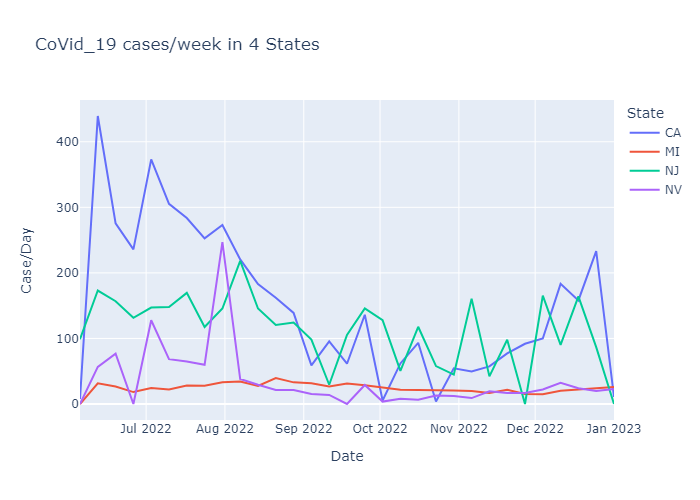

In [25]:
img = px.line(Comp_states_case_death, x="Date", y="Case/Day", color='State', title="CoVid_19 cases/week in 4 States")
img_1= img.to_image(format="png")
Image(img_1)

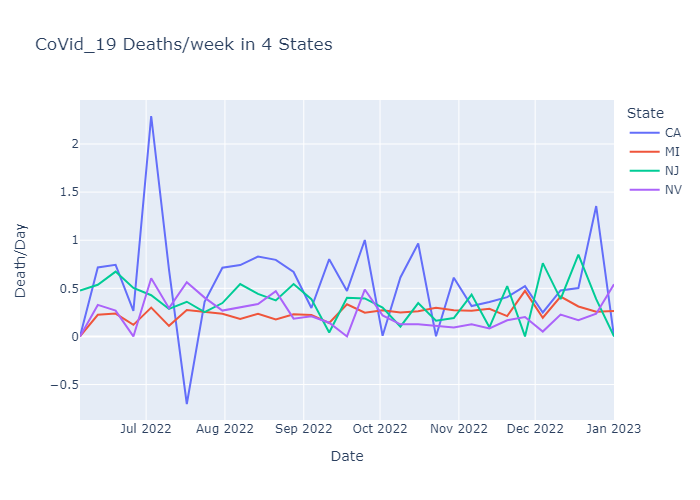

In [26]:
img = px.line(Comp_states_case_death, x="Date", y="Death/Day", color='State', title="CoVid_19 Deaths/week in 4 States")
img_2= img.to_image(format="png")
Image(img_2)

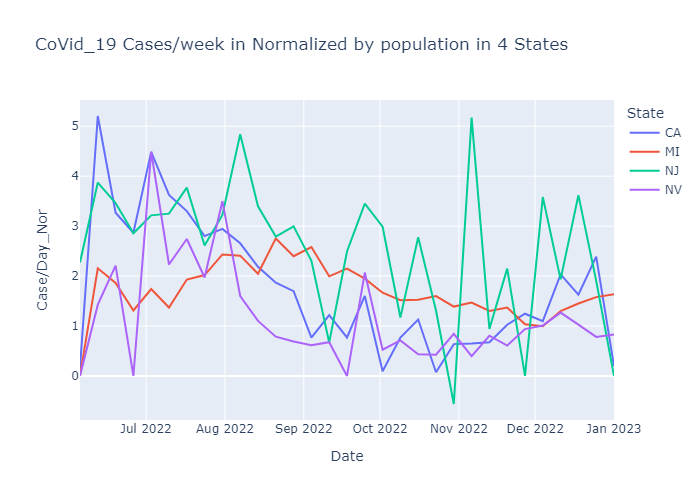

In [27]:
img = px.line(Comp_states_Nor, x="Date", y="Case/Day_Nor", color='State', title="CoVid_19 Cases/week in Normalized by population in 4 States")
img_3= img.to_image(format="png")
Image(img_3)

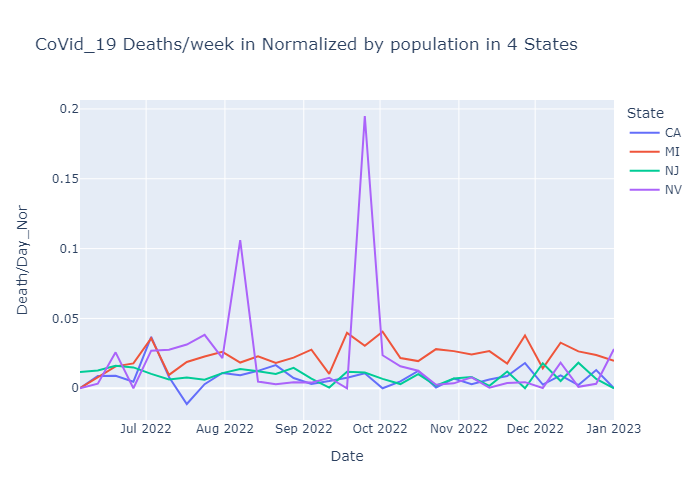

In [28]:
img = px.line(Comp_states_Nor, x="Date", y="Death/Day_Nor", color='State', title="CoVid_19 Deaths/week in Normalized by population in 4 States")
img_4= img.to_image(format="png")
img_4=
Image(img_4)

In this case for all 4 states, California,Michigan, Nevada and New jersey, we clearly analyse that case per week in california were higher than others in the beginning of june 2022. Especially it was summer time and due to large amount of tourist and events were organized in califomrina attracts tone of crowds which implies to hire case/week.

Moreover, after August there was drastic drop in case due to fall session in schools and business turned on. Howeve in State of Michigan, cases were lower than 50 per week due to lower temp and less activities in states.   


NOw for deaths in 4 states, 
By looking image,in july 2022 there were higher number of deaths morethan 2 ,suddenly it dropped to below 0, whcih happened due to isolation and advanced treatment which help of patients to recover more faster. 


But as in form of normalized values deaths graphs has some interesitng move in state of neveda. Normalized deaths was at peak on Aug and early Oct.  


# Task-4 
    Identify 3 counties within a state of your choice with high cases and death rates.

California as my base state,thus we explore 3 counites with high rateof case and deaths. 

In [29]:
Cali_county = Second_half_2022[Second_half_2022['State'] == "CA"] 
#apply filter on super dataset for only CA state data and store in Cali variable.  
Cali_county

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
209242,6001,Alameda County,CA,6,2022-06-01,285709,1870,1671329
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329
...,...,...,...,...,...,...,...,...
271637,6115,Yuba County,CA,6,2022-12-26,19643,121,78668
271638,6115,Yuba County,CA,6,2022-12-27,19650,121,78668
271639,6115,Yuba County,CA,6,2022-12-28,19650,121,78668
271640,6115,Yuba County,CA,6,2022-12-29,19650,121,78668


In [30]:
Cali_county['Case/Day'] = Cali_county['Cases'].diff()
Cali_county['Death/Day'] = Cali_county['Death'].diff()
Cali_county= Cali_county[Cali_county['Date'] != '2022-06-01']
Cali_county

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\2261470342.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\2261470342.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
209247,6001,Alameda County,CA,6,2022-06-06,289682,1870,1671329,3863.0,0.0
...,...,...,...,...,...,...,...,...,...,...
271637,6115,Yuba County,CA,6,2022-12-26,19643,121,78668,4.0,0.0
271638,6115,Yuba County,CA,6,2022-12-27,19650,121,78668,7.0,0.0
271639,6115,Yuba County,CA,6,2022-12-28,19650,121,78668,0.0,0.0
271640,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0


After seperating california's data with filter dates , count total case and death for each counties

In [31]:
sum_county = {'countyFIPS':'first','population':'first','Case/Day':'sum','Death/Day':'sum'}
Cali_Three_County=Cali_county.groupby('County Name').agg(sum_county).reset_index()
Cali_Three_County

,County Name,countyFIPS,population,Case/Day,Death/Day
0,Alameda County,6001,1671329,82238.0,222.0
1,Alpine County,6003,1129,10.0,0.0
2,Amador County,6005,39752,1492.0,9.0
3,Butte County,6007,219186,6896.0,46.0
4,Calaveras County,6009,45905,1296.0,14.0
5,City and County of San Francisco,6075,881549,44228.0,223.0
6,Colusa County,6011,21547,421.0,1.0
7,Contra Costa County,6013,1153526,57738.0,192.0
8,Del Norte County,6015,27812,1438.0,4.0
9,El Dorado County,6017,192843,5639.0,22.0


For finding Highest case/day rate :

We check daily cases and death in california's counties first which is as follow

Following steps used to find highest numebr of cases per day and then we can select top counties with higher cases

In [47]:
#3 Counties with high covid cases
Cali_Three_County.sort_values(by=['Case/Day'],ascending=False).head(3)

,County Name,countyFIPS,population,Case/Day,Death/Day
19,Los Angeles County,6037,10039107,573577.0,2460.0
37,San Diego County,6073,3338330,167995.0,338.0
30,Orange County,6059,3175692,119997.0,618.0


For finding Highest Death/day rate :

Now for finding highest deaths in califonia's county 

In [50]:
#3 Counties with high covid deaths
Cali_Three_County.sort_values(by=['Death/Day'],ascending=False).head(3)

,County Name,countyFIPS,population,Case/Day,Death/Day
19,Los Angeles County,6037,10039107,573577.0,2460.0
30,Orange County,6059,3175692,119997.0,618.0
36,San Bernardino County,6071,2180085,114152.0,492.0


# Task-5 
    Plot weekly trends (new cases and deaths) for the top 3 infected counties.

In [34]:
Cali_county

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
209243,6001,Alameda County,CA,6,2022-06-02,285819,1870,1671329,110.0,0.0
209244,6001,Alameda County,CA,6,2022-06-03,285819,1870,1671329,0.0,0.0
209245,6001,Alameda County,CA,6,2022-06-04,285819,1870,1671329,0.0,0.0
209246,6001,Alameda County,CA,6,2022-06-05,285819,1870,1671329,0.0,0.0
209247,6001,Alameda County,CA,6,2022-06-06,289682,1870,1671329,3863.0,0.0
...,...,...,...,...,...,...,...,...,...,...
271637,6115,Yuba County,CA,6,2022-12-26,19643,121,78668,4.0,0.0
271638,6115,Yuba County,CA,6,2022-12-27,19650,121,78668,7.0,0.0
271639,6115,Yuba County,CA,6,2022-12-28,19650,121,78668,0.0,0.0
271640,6115,Yuba County,CA,6,2022-12-29,19650,121,78668,0.0,0.0


Converting dates into weekly

In [35]:
Cali_3_County_highest_case = Cali_county[Cali_county["County Name"].isin(["Los Angeles County ","San Diego County ","Orange County "])]
Cali_3_County_highest_case


,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
228881,6037,Los Angeles County,CA,6,2022-06-02,2846726,31896,10039107,184.0,0.0
228882,6037,Los Angeles County,CA,6,2022-06-03,2846726,31896,10039107,0.0,0.0
228883,6037,Los Angeles County,CA,6,2022-06-04,2846726,31896,10039107,0.0,0.0
228884,6037,Los Angeles County,CA,6,2022-06-05,2846726,31896,10039107,0.0,0.0
228885,6037,Los Angeles County,CA,6,2022-06-06,2865639,31918,10039107,18913.0,22.0
...,...,...,...,...,...,...,...,...,...,...
248726,6073,San Diego County,CA,6,2022-12-26,962471,5641,3338330,149.0,0.0
248727,6073,San Diego County,CA,6,2022-12-27,962601,5641,3338330,130.0,0.0
248728,6073,San Diego County,CA,6,2022-12-28,962601,5641,3338330,0.0,0.0
248729,6073,San Diego County,CA,6,2022-12-29,962601,5641,3338330,0.0,0.0


In [36]:
X = Cali_3_County_highest_case.groupby(["County Name", pd.Grouper(key='Date', freq='w')])['Case/Day','Death/Day'].agg({'Case/Day':'mean',
                                                                                                'Death/Day' :'mean'}).reset_index()
X

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\3029043118.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,County Name,Date,Case/Day,Death/Day
0,Los Angeles County,2022-06-05,46.000000,0.000000
1,Los Angeles County,2022-06-12,7179.571429,10.428571
2,Los Angeles County,2022-06-19,4663.714286,8.571429
3,Los Angeles County,2022-06-26,3644.571429,4.428571
4,Los Angeles County,2022-07-03,6606.000000,26.714286
...,...,...,...,...
88,San Diego County,2022-12-04,552.571429,1.000000
89,San Diego County,2022-12-11,818.428571,2.142857
90,San Diego County,2022-12-18,692.714286,3.428571
91,San Diego County,2022-12-25,1327.571429,4.714286


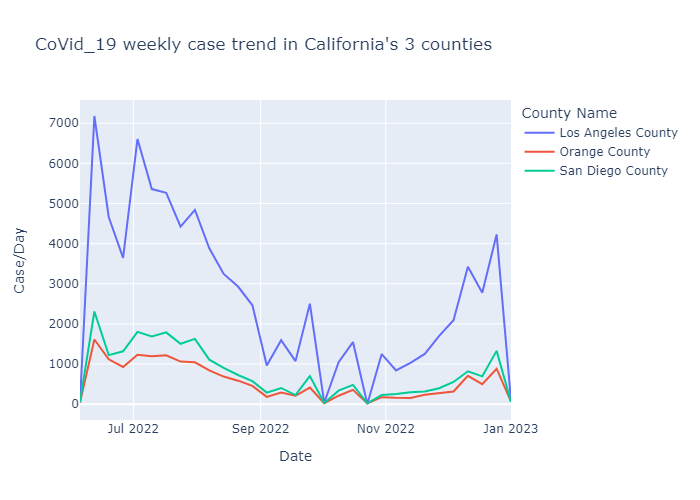

In [37]:
img = px.line(X, x="Date", y="Case/Day", color='County Name', title="CoVid_19 weekly case trend in California's 3 counties")
img_5= img.to_image(format="png")
Image(img_5)

Above fingure illustares, in Los Angeles county there was highest number of case which also match with state and US case /day trend which is more than 7000 cases. Hiwever, after summer session there was a drastic drop in case till early November and then it went up 4000 case/day.


By these we can say that more Tourist and events caueses highest cases in county of LA

In [38]:
Cali_3_County_highest_death = Cali_county[Cali_county["County Name"].isin(["Los Angeles County ","San Bernardino County ","Orange County "])]
Cali_3_County_highest_death

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
228881,6037,Los Angeles County,CA,6,2022-06-02,2846726,31896,10039107,184.0,0.0
228882,6037,Los Angeles County,CA,6,2022-06-03,2846726,31896,10039107,0.0,0.0
228883,6037,Los Angeles County,CA,6,2022-06-04,2846726,31896,10039107,0.0,0.0
228884,6037,Los Angeles County,CA,6,2022-06-05,2846726,31896,10039107,0.0,0.0
228885,6037,Los Angeles County,CA,6,2022-06-06,2865639,31918,10039107,18913.0,22.0
...,...,...,...,...,...,...,...,...,...,...
247635,6071,San Bernardino County,CA,6,2022-12-26,696352,8103,2180085,79.0,0.0
247636,6071,San Bernardino County,CA,6,2022-12-27,696415,8103,2180085,63.0,0.0
247637,6071,San Bernardino County,CA,6,2022-12-28,696415,8103,2180085,0.0,0.0
247638,6071,San Bernardino County,CA,6,2022-12-29,696415,8103,2180085,0.0,0.0


In [39]:
Y = Cali_3_County_highest_death.groupby(["County Name", pd.Grouper(key='Date', freq='w')])['Case/Day','Death/Day'].agg({'Case/Day':'mean',
                                                                                                'Death/Day' :'mean'}).reset_index()
Y

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\3223465735.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,County Name,Date,Case/Day,Death/Day
0,Los Angeles County,2022-06-05,46.000000,0.000000
1,Los Angeles County,2022-06-12,7179.571429,10.428571
2,Los Angeles County,2022-06-19,4663.714286,8.571429
3,Los Angeles County,2022-06-26,3644.571429,4.428571
4,Los Angeles County,2022-07-03,6606.000000,26.714286
...,...,...,...,...
88,San Bernardino County,2022-12-04,321.714286,0.000000
89,San Bernardino County,2022-12-11,694.000000,0.285714
90,San Bernardino County,2022-12-18,527.285714,0.142857
91,San Bernardino County,2022-12-25,843.714286,1.000000


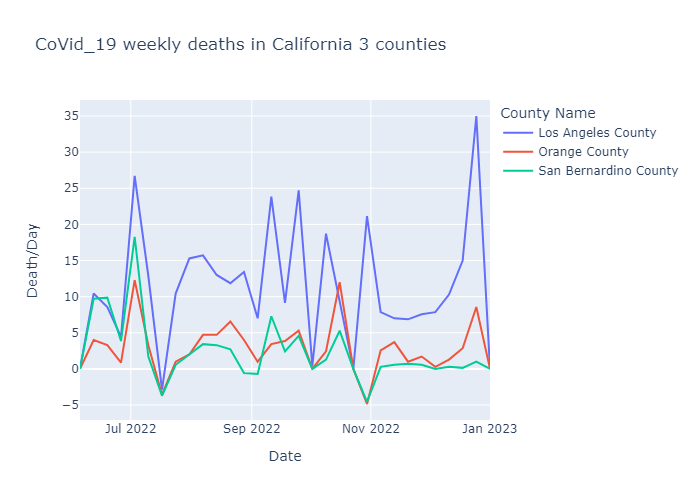

In [40]:
img = px.line(Y, x="Date", y="Death/Day", color='County Name', title="CoVid_19 weekly deaths in California 3 counties")
img_6= img.to_image(format="png")
Image(img_6)

Similarly death rate for LA county was also higher in july where there was hihest case .
Also at end of year 2022, due to festivals and holidays three was highest case and death in LA county. which is perfectly match with US pattern. 

# Task-6 
    Show plots by raw values and log normalized values.

For raw values and normalized values by population for california counties

Already plot all graph above

    First, we do normalization for highest cases in 3 counties such as      
        Los Angeles County
        San Diego County 	
        Orange County 	

In [41]:
Cali_3_County_highest_case

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
228881,6037,Los Angeles County,CA,6,2022-06-02,2846726,31896,10039107,184.0,0.0
228882,6037,Los Angeles County,CA,6,2022-06-03,2846726,31896,10039107,0.0,0.0
228883,6037,Los Angeles County,CA,6,2022-06-04,2846726,31896,10039107,0.0,0.0
228884,6037,Los Angeles County,CA,6,2022-06-05,2846726,31896,10039107,0.0,0.0
228885,6037,Los Angeles County,CA,6,2022-06-06,2865639,31918,10039107,18913.0,22.0
...,...,...,...,...,...,...,...,...,...,...
248726,6073,San Diego County,CA,6,2022-12-26,962471,5641,3338330,149.0,0.0
248727,6073,San Diego County,CA,6,2022-12-27,962601,5641,3338330,130.0,0.0
248728,6073,San Diego County,CA,6,2022-12-28,962601,5641,3338330,0.0,0.0
248729,6073,San Diego County,CA,6,2022-12-29,962601,5641,3338330,0.0,0.0


After that we convert in cases in to normalized value by population as base on 10,000

In [42]:
Cali_3_County_highest_case['Case/Day_Nor'] = (Cali_3_County_highest_case['Case/Day']/Cali_3_County_highest_case['population'])*10000
Cali_3_County_highest_case['Death/Day_Nor'] = (Cali_3_County_highest_case['Death/Day']/Cali_3_County_highest_case['population'])*10000
Cali_3_County_highest_case

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\291865378.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\291865378.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day,Case/Day_Nor,Death/Day_Nor
228881,6037,Los Angeles County,CA,6,2022-06-02,2846726,31896,10039107,184.0,0.0,0.183283,0.000000
228882,6037,Los Angeles County,CA,6,2022-06-03,2846726,31896,10039107,0.0,0.0,0.000000,0.000000
228883,6037,Los Angeles County,CA,6,2022-06-04,2846726,31896,10039107,0.0,0.0,0.000000,0.000000
228884,6037,Los Angeles County,CA,6,2022-06-05,2846726,31896,10039107,0.0,0.0,0.000000,0.000000
228885,6037,Los Angeles County,CA,6,2022-06-06,2865639,31918,10039107,18913.0,22.0,18.839325,0.021914
...,...,...,...,...,...,...,...,...,...,...,...,...
248726,6073,San Diego County,CA,6,2022-12-26,962471,5641,3338330,149.0,0.0,0.446331,0.000000
248727,6073,San Diego County,CA,6,2022-12-27,962601,5641,3338330,130.0,0.0,0.389416,0.000000
248728,6073,San Diego County,CA,6,2022-12-28,962601,5641,3338330,0.0,0.0,0.000000,0.000000
248729,6073,San Diego County,CA,6,2022-12-29,962601,5641,3338330,0.0,0.0,0.000000,0.000000


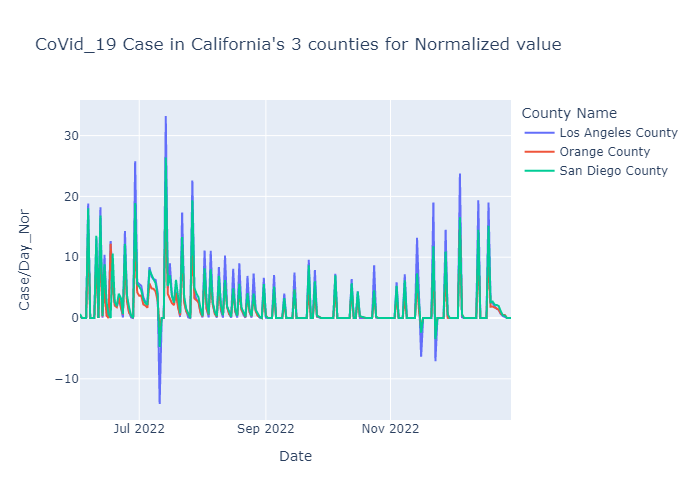

In [43]:
img = px.line(Cali_3_County_highest_case, x="Date", y="Case/Day_Nor", color='County Name', title="CoVid_19 Case in California's 3 counties for Normalized value")
img_7= img.to_image(format="png")
Image(img_7)

Similarly as case/week raw graph, Normalized graph also have quite similar pattern but these time I applied case/day normalized value in graph which gives us dense graph.

Secondly, we do normalization for highest death in 3 counties such as 
   
    Los Angeles County
    San Bernardino County 	
    Orange County

In [44]:
Cali_3_County_highest_death = Cali_county[Cali_county["County Name"].isin(["Los Angeles County ","San Bernardino County ","Orange County "])]
Cali_3_County_highest_death

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day
228881,6037,Los Angeles County,CA,6,2022-06-02,2846726,31896,10039107,184.0,0.0
228882,6037,Los Angeles County,CA,6,2022-06-03,2846726,31896,10039107,0.0,0.0
228883,6037,Los Angeles County,CA,6,2022-06-04,2846726,31896,10039107,0.0,0.0
228884,6037,Los Angeles County,CA,6,2022-06-05,2846726,31896,10039107,0.0,0.0
228885,6037,Los Angeles County,CA,6,2022-06-06,2865639,31918,10039107,18913.0,22.0
...,...,...,...,...,...,...,...,...,...,...
247635,6071,San Bernardino County,CA,6,2022-12-26,696352,8103,2180085,79.0,0.0
247636,6071,San Bernardino County,CA,6,2022-12-27,696415,8103,2180085,63.0,0.0
247637,6071,San Bernardino County,CA,6,2022-12-28,696415,8103,2180085,0.0,0.0
247638,6071,San Bernardino County,CA,6,2022-12-29,696415,8103,2180085,0.0,0.0


After that we convert in Deaths into normalized form by population as base on 10,000

In [45]:
Cali_3_County_highest_death['Case/Day_Nor'] = (Cali_3_County_highest_death['Case/Day']/Cali_3_County_highest_death['population'])*10000
Cali_3_County_highest_death['Death/Day_Nor'] = (Cali_3_County_highest_death['Death/Day']/Cali_3_County_highest_death['population'])*10000
Cali_3_County_highest_death

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\1402395836.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\prati\AppData\Local\Temp\ipykernel_15724\1402395836.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,Case/Day,Death/Day,Case/Day_Nor,Death/Day_Nor
228881,6037,Los Angeles County,CA,6,2022-06-02,2846726,31896,10039107,184.0,0.0,0.183283,0.000000
228882,6037,Los Angeles County,CA,6,2022-06-03,2846726,31896,10039107,0.0,0.0,0.000000,0.000000
228883,6037,Los Angeles County,CA,6,2022-06-04,2846726,31896,10039107,0.0,0.0,0.000000,0.000000
228884,6037,Los Angeles County,CA,6,2022-06-05,2846726,31896,10039107,0.0,0.0,0.000000,0.000000
228885,6037,Los Angeles County,CA,6,2022-06-06,2865639,31918,10039107,18913.0,22.0,18.839325,0.021914
...,...,...,...,...,...,...,...,...,...,...,...,...
247635,6071,San Bernardino County,CA,6,2022-12-26,696352,8103,2180085,79.0,0.0,0.362371,0.000000
247636,6071,San Bernardino County,CA,6,2022-12-27,696415,8103,2180085,63.0,0.0,0.288980,0.000000
247637,6071,San Bernardino County,CA,6,2022-12-28,696415,8103,2180085,0.0,0.0,0.000000,0.000000
247638,6071,San Bernardino County,CA,6,2022-12-29,696415,8103,2180085,0.0,0.0,0.000000,0.000000


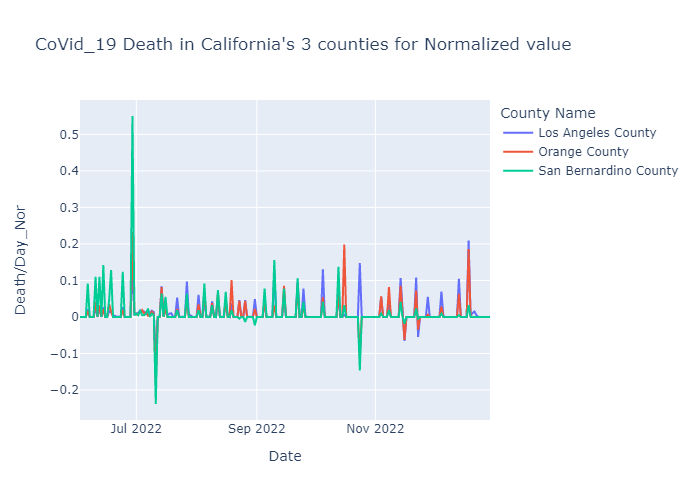

In [46]:
img = px.line(Cali_3_County_highest_death, x="Date", y="Death/Day_Nor", color='County Name', title="CoVid_19 Death in California's 3 counties for Normalized value")
img_8= img.to_image(format="png")
Image(img_8)

# End